# PHYS 404/604: Computational Techniques in Physics

Spring 2022, Lecture 19

Monday, April 25

Instructor: Avery Bailey (notebook developed by CC Yang)

## Interpolation and Extrapolation

### Polynomial Interpolation

In this exercise, we experiment with polynomial interpolation on known functions so that we have a better idea of how well it works.  The python package SciPy offers two algorithms to execute polynomial interpolation.  Here we only use one of them.

The first function is an exponential function $f(x) = \exp(x)$.  Recall that the order of the polynomial interpolant is the number of nodes minus one.  Experiment with different number of nodes using the following code.  Pay attention to the error in different domains, i.e., $x < a$ (extrapolation), $a \leq x \leq b$ (interpolation), or $x > b$ (extrapolation).

The maximum absolute error for 0 <= x <= 2 is 1.52
The maximum absolute error for -1 <= x < 0 is 2.56
The maximum absolute error for 2 < x <= 3 is 9.5


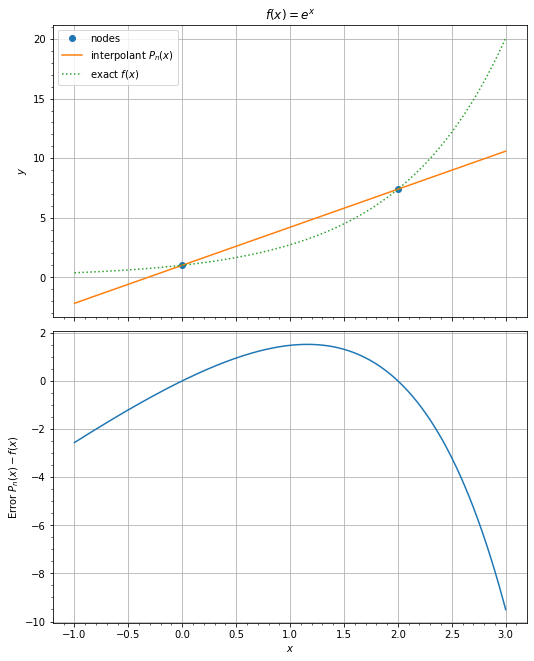

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import barycentric_interpolate  # SciPy function to execute polynomial interpolation

# Define the function we want to experiment on.
def func(x):
    return np.exp(x)

# Define the nodes.
a, b = 0, 2  # endpoints
nnodes = 2   # Experiment with this.
xi = np.linspace(a, b, nnodes)
yi = func(xi)

# Compute the polynomial interpolation.
xmin, xmax = -1, 3
x = np.linspace(xmin, xmax, 201)
y = barycentric_interpolate(xi, yi, x)

# Compute the exact values.
ye = func(x)

# Compute the error and print the maximum absolute errors for interpolation and extrapolation.
dy = y - ye
err = np.abs(dy)
errint = max(err[np.where((a <= x) & (x <= b))])
errext_left = max(err[np.where(x < a)])
errext_right = max(err[np.where(x > b)])

print("The maximum absolute error for {} <= x <= {} is {:.3g}".format(a, b, errint))
print("The maximum absolute error for {} <= x < {} is {:.3g}".format(xmin, a, errext_left))
print("The maximum absolute error for {} < x <= {} is {:.3g}".format(b, xmax, errext_right))

# Initiate the plot.
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex="col", figsize=(8.5,11))
fig.subplots_adjust(hspace=0.05)

# Plot the nodes.
ax1.plot(xi, yi, 'o', label="nodes")

# Plot the interpolant.
ax1.plot(x, y, '-', label="interpolant $P_n(x)$")

# Plot the exact function.
ax1.plot(x, ye, ':', label="exact $f(x)$")

# Plot the error.
ax2.plot(x, dy)

# Fine tune the plot.
ax1.grid()
ax1.minorticks_on()
ax1.set_ylabel(r"$y$")
ax1.legend()
ax1.set_title(r"$f(x) = e^x$")
ax2.grid()
ax2.minorticks_on()
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"Error $P_n(x) - f(x)$")

plt.show()

Note down the maximum absolute error for each domain you found in the following code to plot the errors against the order of the polynomial interpolant.

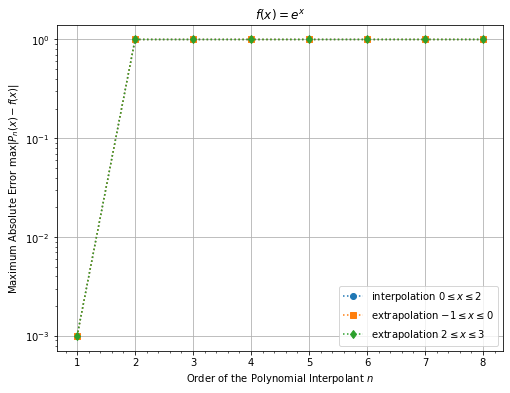

In [2]:
# COMPLETE ME: Register your values here.
nodes = [2, 3, 4, 5, 6, 7, 8, 9]  # number of nodes used
errint = [0.001, 1, 1, 1, 1, 1, 1, 1]  # error for interpolation
errext_left = [0.001, 1, 1, 1, 1, 1, 1, 1]  # error for extrapolation below a
errext_right = [0.001, 1, 1, 1, 1, 1, 1, 1]  # error for extrapolation above b

# Initiate the plot.
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

# Plot the error againt the order of the polynomial interpolant.
order = np.array(nodes) - 1
ax.semilogy(order, np.array(errint), 'o:', label=r"interpolation ${} \leq x \leq {}$".format(a,b))
ax.semilogy(order, np.array(errext_left), 's:', label=r"extrapolation ${} \leq x \leq {}$".format(xmin,a))
ax.semilogy(order, np.array(errext_right), 'd:', label=r"extrapolation ${} \leq x \leq {}$".format(b,xmax))

# Fine tune the plot.
ax.grid()
ax.minorticks_on()
ax.set_xlabel(r"Order of the Polynomial Interpolant $n$")
ax.set_ylabel(r"Maximum Absolute Error $\max|P_n(x) - f(x)|$")
ax.legend()
ax.set_title(r"$f(x) = e^x$")

plt.show()

What trends did you find?  Is it consistent with the expected error from polynomial interpolation?  Is it safe to extrapolate?  Discuss.

Now, we move on to a different function: the absolute function $f(x) = |x|$.  Repeat the same exercise as above. After using uniformly spaced nodes, test the convergence of Chebyshev nodes. 

The maximum absolute error for -1 <= x <= 1 is 1
The maximum absolute error for -2 <= x < -1 is 1
The maximum absolute error for 1 < x <= 2 is 1


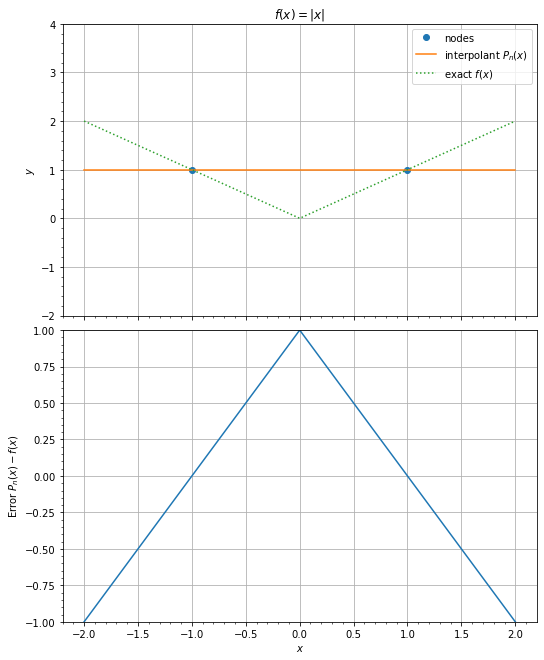

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import barycentric_interpolate  # SciPy function to execute polynomial interpolation

# Define the function we want to experiment on.
def func(x):
    return np.abs(x)

# Define the nodes.
a, b = -1, 1  # endpoints
nnodes = 2    # Experiment with this.
k = np.arange(1,nnodes+1)       # indices for chebyshev nodes running from 1,2,3,...,nnodes
xi = np.linspace(a, b, nnodes)  # test uniform node convergence, and then edit for chebyshev nodes
yi = func(xi)

# Compute the polynomial interpolation.
xmin, xmax = -2, 2
x = np.linspace(xmin, xmax, 201)
y = barycentric_interpolate(xi, yi, x)

# Compute the exact values.
ye = func(x)

# Compute the error and print the maximum absolute errors for interpolation and extrapolation.
dy = y - ye
err = np.abs(dy)
errint = max(err[np.where((a <= x) & (x <= b))])
errext_left = max(err[np.where(x < a)])
errext_right = max(err[np.where(x > b)])

print("The maximum absolute error for {} <= x <= {} is {:.3g}".format(a, b, errint))
print("The maximum absolute error for {} <= x < {} is {:.3g}".format(xmin, a, errext_left))
print("The maximum absolute error for {} < x <= {} is {:.3g}".format(b, xmax, errext_right))

# Initiate the plot.
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex="col", figsize=(8.5,11))
fig.subplots_adjust(hspace=0.05)

# Plot the nodes.
ax1.plot(xi, yi, 'o', label="nodes")

# Plot the interpolant.
ax1.plot(x, y, '-', label="interpolant $P_n(x)$")

# Plot the exact function.
ax1.plot(x, ye, ':', label="exact $f(x)$")

# Plot the error.
ax2.plot(x, dy)

# Fine tune the plot.
ax1.grid()
ax1.minorticks_on()
ax1.set_ylim(-2,4)
ax1.set_ylabel(r"$y$")
ax1.legend()
ax1.set_title(r"$f(x) = |x|$")
ax2.grid()
ax2.minorticks_on()
ax2.set_ylim(-1,1)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"Error $P_n(x) - f(x)$")

plt.show()

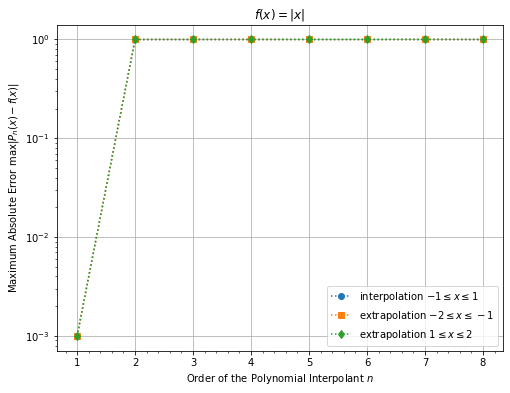

In [4]:
# COMPLETE ME: Register your values here.
nodes = [2, 3, 4, 5, 6, 7, 8, 9]  # number of nodes used
errint = [0.001, 1, 1, 1, 1, 1, 1, 1]  # error for interpolation
errext_left = [0.001, 1, 1, 1, 1, 1, 1, 1]  # error for extrapolation below a
errext_right = [0.001, 1, 1, 1, 1, 1, 1, 1]  # error for extrapolation above b

# Initiate the plot.
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

# Plot the error againt the order of the polynomial interpolant.
order = np.array(nodes) - 1
ax.semilogy(order, np.array(errint), 'o:', label=r"interpolation ${} \leq x \leq {}$".format(a,b))
ax.semilogy(order, np.array(errext_left), 's:', label=r"extrapolation ${} \leq x \leq {}$".format(xmin,a))
ax.semilogy(order, np.array(errext_right), 'd:', label=r"extrapolation ${} \leq x \leq {}$".format(b,xmax))

# Fine tune the plot.
ax.grid()
ax.minorticks_on()
ax.set_xlabel(r"Order of the Polynomial Interpolant $n$")
ax.set_ylabel(r"Maximum Absolute Error $\max|P_n(x) - f(x)|$")
ax.set_title(r"$f(x) = |x|$")
ax.legend()

plt.show()

Did you find the same error properties as found for the exponential function?  Discuss the implications.

## Cubic Splines

We now consider cubic-spline interpolation.  Conveniently, the SciPy package also provides a function for such interpolation.  Read [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) for how to use the function.

Again, we use the exponential function $f(x) = \exp(x)$ as an example.  We are interested in the effects of using different boundary conditions.  Specifically, we want to compare the *natural* and the *clamped* boundary conditions.  Note that *you should be able to find the exact first derivatives at the endpoints*.

Complete the following code to do this.

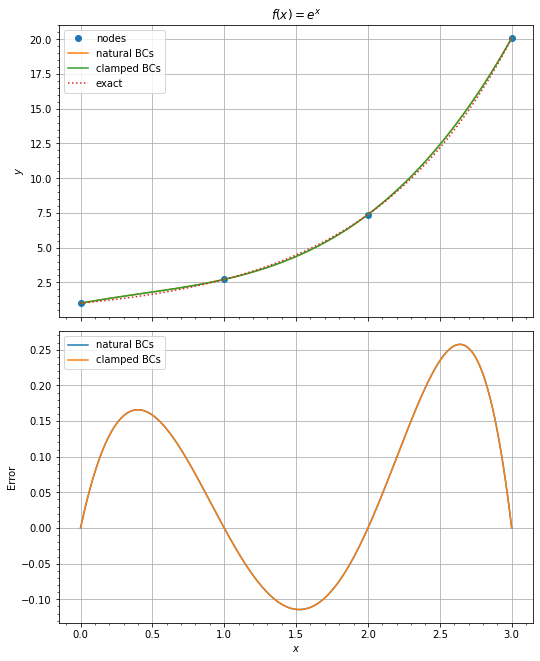

In [5]:
from scipy.interpolate import CubicSpline  # SciPy function to execute cubic-spline interpolation

# Define the function we want to experiment on.
def func(x):
    return np.exp(x)

# Define the nodes.
a, b = 0, 3  # endpoints
nnodes = 4  # We now fix at four nodes.
xi = np.linspace(a, b, nnodes)
yi = func(xi)

# COMPLETE ME: Compute the cubic splines using the natural boundary conditions.
csn = CubicSpline(xi, yi)

# COMPLETE ME: Compute the cubic splines using the clamped boundary conditions.
csc = CubicSpline(xi, yi)

# Define a fine grid for interpolation.
x = np.linspace(a, b, 201)

# Compute the exact values.
ye = func(x)

# Initiate the plot.
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex="col", figsize=(8.5,11))
fig.subplots_adjust(hspace=0.05)

# Plot the nodes.
ax1.plot(xi, yi, 'o', label="nodes")

# Plot the splines.
ax1.plot(x, csn(x), '-', label="natural BCs")
ax1.plot(x, csc(x), '-', label="clamped BCs")

# Plot the exact function.
ax1.plot(x, ye, ':', label="exact")

# Plot the errors.
ax2.plot(x, csn(x) - ye, label="natural BCs")
ax2.plot(x, csc(x) - ye, label="clamped BCs")

# Fine tune the plot.
ax1.grid()
ax1.minorticks_on()
ax1.set_ylabel(r"$y$")
ax1.legend()
ax1.set_title(r"$f(x) = e^x$")
ax2.grid()
ax2.minorticks_on()
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"Error")
ax2.legend()

plt.show()

Which boundary conditions work better?

You might also want to experiment with different number of nodes, or even a different function, like the absolute function we used earlier.